# Exploring Relationship [6.2] - Task

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### --------------------------------------------------

## 1. Importing Visualization Libraries and Data

In [35]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Check matplotlib version

matplotlib.__version__

'3.10.0'

In [37]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [38]:
# Assigning Path

path = r'/Users/elia/Desktop/DATA ANALYST/CAREER FOUNDRY/B - Data Analytics Immersion/6 - ADVANCED ANALYTICS & DASHBOARD/King County House Market Analysis'

In [39]:
# Import data

df_house = pd.read_pickle(os.path.join(path, '02 - Data', 'Prepared Data', 'house_dataset_clean.pkl'))

### --------------------------------------------------

## 2. Data Cleaning

### Renaming Columns

In [40]:
# Inspecting dataframe

df_house.shape

(21613, 25)

In [41]:
# Inspecting columns

df_house.columns

Index(['house_id', 'date', 'price', 'bedrooms', 'bathrooms',
       'house_total_sqft', 'lot_total_sqft', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'floors_sqft', 'basement_sqft', 'year_built',
       'year_renovated', 'zipcode', 'latitude', 'longitude', 'sqft_living15',
       'sqft_lot15', 'waterfront_text', 'view_text', 'house_condition',
       'grade_text'],
      dtype='object')

In [42]:
# Inspecting datatypes

df_house.dtypes

house_id              int64
date                 object
price               float64
bedrooms              int64
bathrooms           float64
house_total_sqft      int64
lot_total_sqft        int64
floors              float64
waterfront            int64
view                  int64
condition             int64
grade                 int64
floors_sqft           int64
basement_sqft         int64
year_built            int64
year_renovated        int64
zipcode               int64
latitude            float64
longitude           float64
sqft_living15         int64
sqft_lot15            int64
waterfront_text      object
view_text            object
house_condition      object
grade_text           object
dtype: object

In [43]:
# Inspecting dataframe

df_house.head()

,house_id,date,price,bedrooms,bathrooms,house_total_sqft,lot_total_sqft,floors,waterfront,view,...,year_renovated,zipcode,latitude,longitude,sqft_living15,sqft_lot15,waterfront_text,view_text,house_condition,grade_text
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,No,No View,Average,Average
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,No,No View,Average,Average
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,No,No View,Average,Low Average
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,No,No View,Very Good,Average
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,No,No View,Average,Good


### I have already done this step in the previous task.

##### --------------------------------------------------

### Missing Values Check

In [44]:
# Check for missing values

df_house.isnull().sum()

house_id            0
date                0
price               0
bedrooms            0
bathrooms           0
house_total_sqft    0
lot_total_sqft      0
floors              0
waterfront          0
view                0
condition           0
grade               0
floors_sqft         0
basement_sqft       0
year_built          0
year_renovated      0
zipcode             0
latitude            0
longitude           0
sqft_living15       0
sqft_lot15          0
waterfront_text     0
view_text           0
house_condition     0
grade_text          0
dtype: int64

#### No Missing Values.

In [45]:
# Find duplicates

df_dups = df_house[df_house.duplicated()]

In [46]:
# Check duplicates

df_dups.shape

(0, 25)

#### No Duplicates.

##### --------------------------------------------------

### Mixed-Type Data

In [47]:
# Identify columns containing mixed data types and print their names

for col in df_house.columns.tolist():
      weird = (df_house[[col]].applymap(type) != df_house[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_house[weird]) > 0:
        print (col)

/var/folders/kg/d6djty_168l6kzcc718bcldm0000gn/T/ipykernel_4086/61408532.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_house[[col]].applymap(type) != df_house[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/kg/d6djty_168l6kzcc718bcldm0000gn/T/ipykernel_4086/61408532.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_house[[col]].applymap(type) != df_house[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/kg/d6djty_168l6kzcc718bcldm0000gn/T/ipykernel_4086/61408532.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_house[[col]].applymap(type) != df_house[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/kg/d6djty_168l6kzcc718bcldm0000gn/T/ipykernel_4086/61408532.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_house[[col]].applymap(type) != df_house[[col]].iloc[0]

In [48]:
# Check for Mixed Data Types

for col in df_house.columns:
    print(col, pd.api.types.infer_dtype(df_house[col]))

house_id integer
date string
price floating
bedrooms integer
bathrooms floating
house_total_sqft integer
lot_total_sqft integer
floors floating
waterfront integer
view integer
condition integer
grade integer
floors_sqft integer
basement_sqft integer
year_built integer
year_renovated integer
zipcode integer
latitude floating
longitude floating
sqft_living15 integer
sqft_lot15 integer
waterfront_text string
view_text string
house_condition string
grade_text string


In [49]:
# Print any columns that contain more than one data type

for col in df_house.columns:
    unique_types = df_house[col].apply(type).unique()
    if len(unique_types) > 1:
        print(col, unique_types)

#### No Mixed Data Type Columns.

In [50]:
# Export data to Csv

df_house.to_csv(os.path.join(path, '02 - Data','Prepared Data', 'house_dataset_clean.csv'))

#### --------------------------------------------------

## 3. Exploring Relationships

### [2] Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis. For instance, discard “ID,” “date,” and “index” variables.

#### Considering my previous questions i will pick those variables:

##### Price | Bedrooms | Bathrooms | House_Total_Sqft | Lot_Total_Sqft | Waterfront | View | Condition | Grade | Floors_sqft | Year_built | Year Renovated | Zipcode

##### --------------------------------------------------

### [3] Create a correlation matrix heatmap (colored). Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [51]:
# Create a correlation matrix using pandas

df_house.corr()

ValueError: could not convert string to float: '20141013T000000'

In [52]:
# Create a correlation matrix using pandas

# First, select only numeric columns for correlation
numeric_df = df_house.select_dtypes(include=['number'])

# Now calculate correlation on numeric columns only
numeric_df.corr()

# Alternatively, if you need to include the column with 'No' values,
# you could convert it to numeric values first (if appropriate)
# For example, if it's a Yes/No column:
# df_house['column_name'] = df_house['column_name'].map({'Yes': 1, 'No': 0})
# df_house.corr()

,house_id,price,bedrooms,bathrooms,house_total_sqft,lot_total_sqft,floors,waterfront,view,condition,grade,floors_sqft,basement_sqft,year_built,year_renovated,zipcode,latitude,longitude,sqft_living15,sqft_lot15
house_id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
house_total_sqft,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
lot_total_sqft,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [53]:
# Drop Columns That Are Not Part Of Interested Variables [Creating a subset of the dataframe}

df_house_eda = df_house.drop(['date', 'grade_text', 'house_condition', 'view_text', 'waterfront_text', 'house_id', 'lot_total_sqft', 'floors', 'view', 'condition', 'floors_sqft', 'basement_sqft', 'year_built', 'year_renovated', 'latitude', 'longitude', 'sqft_living15', 'sqft_lot15'], axis=1)

In [54]:
# Create a correlation matrix using pandas

df_house_eda.corr()

,price,bedrooms,bathrooms,house_total_sqft,waterfront,grade,zipcode
price,1.000000,0.308350,0.525138,0.702035,0.266369,0.667434,-0.053203
bedrooms,0.308350,1.000000,0.515884,0.576671,-0.006582,0.356967,-0.152668
bathrooms,0.525138,0.515884,1.000000,0.754665,0.063744,0.664983,-0.203866
house_total_sqft,0.702035,0.576671,0.754665,1.000000,0.103818,0.762704,-0.199430
waterfront,0.266369,-0.006582,0.063744,0.103818,1.000000,0.082775,0.030285
grade,0.667434,0.356967,0.664983,0.762704,0.082775,1.000000,-0.184862
zipcode,-0.053203,-0.152668,-0.203866,-0.199430,0.030285,-0.184862,1.000000


In [55]:
# Inpect dataframe

df_house_eda

,price,bedrooms,bathrooms,house_total_sqft,waterfront,grade,zipcode
0,221900.0,3,1.00,1180,0,7,98178
1,538000.0,3,2.25,2570,0,7,98125
2,180000.0,2,1.00,770,0,6,98028
3,604000.0,4,3.00,1960,0,7,98136
4,510000.0,3,2.00,1680,0,8,98074
...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,0,8,98103
21609,400000.0,4,2.50,2310,0,8,98146
21610,402101.0,2,0.75,1020,0,7,98144
21611,400000.0,3,2.50,1600,0,8,98027


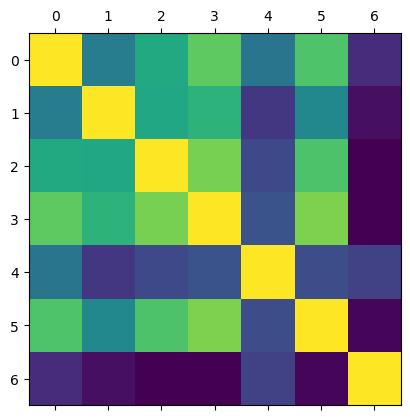

In [56]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_house_eda.corr())
plt.show()

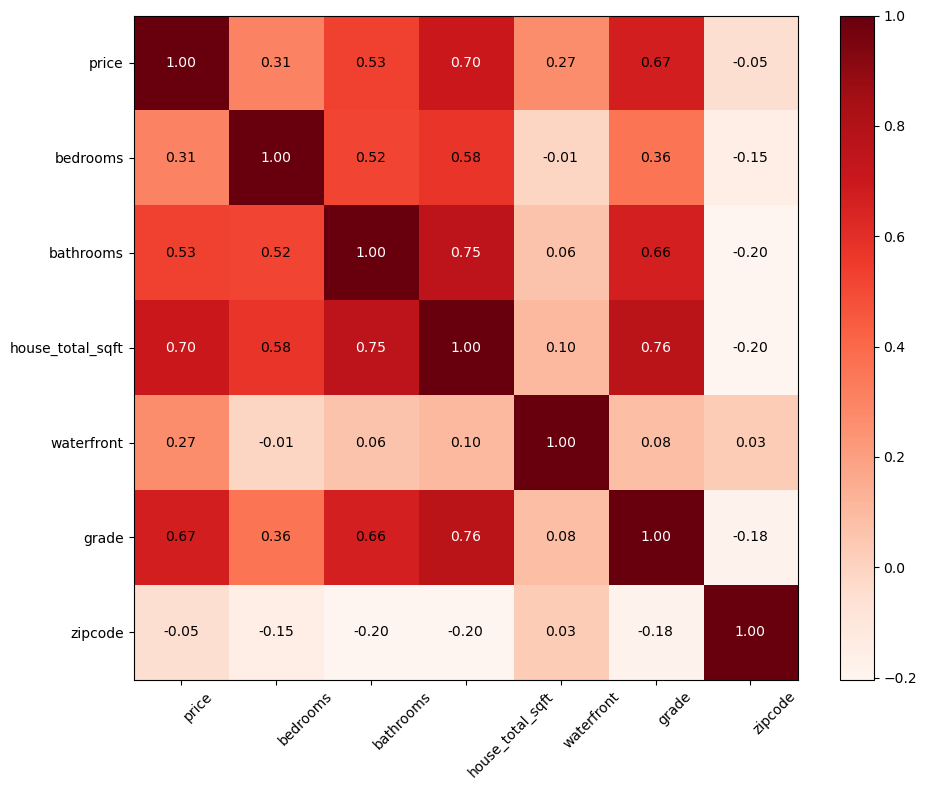

In [57]:
# First, ensure we're only using numeric columns for correlation
corr = df_house_eda.select_dtypes(include=['float64', 'int64']).corr()

# Create a new figure with the specified size
plt.figure(figsize=(10, 8))

# Use imshow instead of matshow to avoid the boolean evaluation issue
variables_heatmap = plt.imshow(corr, cmap='Reds')

# Set the tick labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='left')
plt.yticks(range(len(corr.columns)), corr.columns)

# Add a colorbar
plt.colorbar(variables_heatmap)

# Add correlation values to the cells
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        # Format the value to show only 2 decimal places
        text = plt.text(j, i, f'{corr.iloc[i, j]:.2f}', 
                       ha='center', va='center', 
                       color='black' if corr.iloc[i, j] < 0.7 else 'white')

# Adjust layout to make room for rotated labels
plt.tight_layout()

# Show the plot
plt.show()

In [58]:
# Export the Variables Heatmap

variables_heatmap.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'variables_heatmap.png'))

#### I can notice that indeed from this heatmap it looks like the house total sqft, grade, bathrooms and bedroomns of the house seems to be the biggest house price correlations, it is important to notice that the grade values are in theory logically from the lowest to the highest, as to emulate a bigger number that is equal to a better grading of the house. Another important factor to notice is that from this heatmap there isnt any correlation between the zipcode and the price increase (this can be aswell considered normal as not necessarily a higher zipcode means higher price).

##### --------------------------------------------------

### [4] Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell.

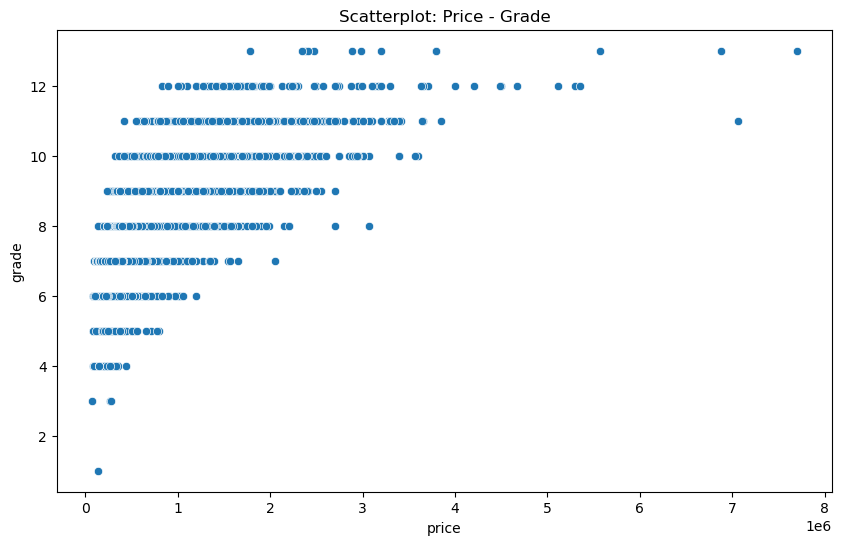

In [59]:
# Create a scatterplot to visualize the relationship between price and grade

scatterplot_price_grade = plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_house_eda,
    x='price',
    y='grade'
)
plt.title('Scatterplot: Price - Grade')
plt.xlabel('price')
plt.ylabel('grade')
plt.show()

In [60]:
# Export the Scatterplot

scatterplot_price_grade.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'scatterplot_price_grade.png'))

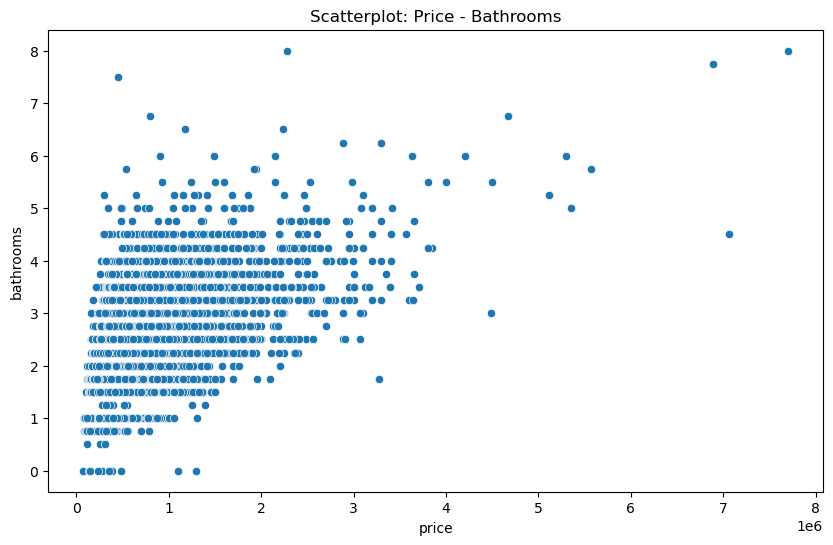

In [61]:
# Create a scatterplot to show the relationship between price and number of bathrooms

scatterplot_price_bathrooms = plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_house_eda,
    x='price',
    y='bathrooms'
)
plt.title('Scatterplot: Price - Bathrooms')
plt.xlabel('price')
plt.ylabel('bathrooms')
plt.show()

In [62]:
# Export the Scatterplot

scatterplot_price_bathrooms.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'scatterplot_price_bathrooms.png'))

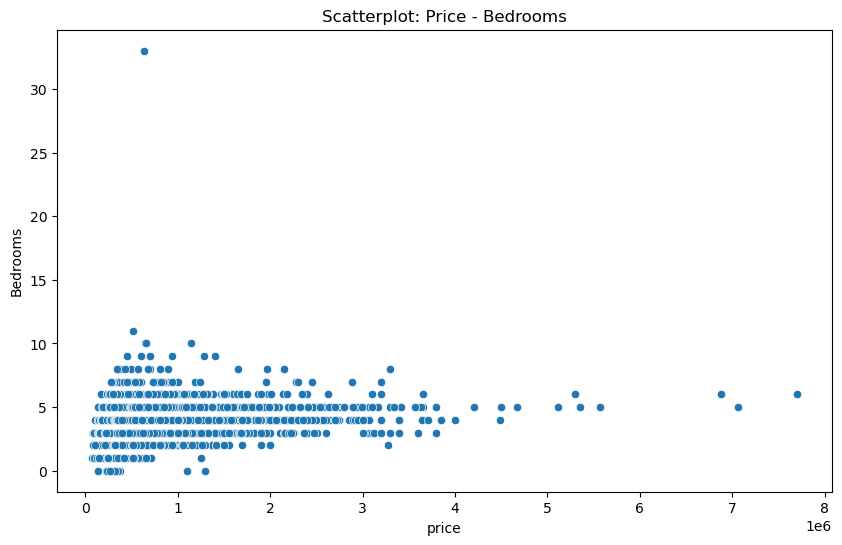

In [63]:
# Create a scatterplot to show the relationship between price and number of bedrooms

scatterplot_price_bedrooms = plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_house_eda,
    x='price',
    y='bedrooms'
)
plt.title('Scatterplot: Price - Bedrooms')
plt.xlabel('price')
plt.ylabel('Bedrooms')
plt.show()

In [64]:
# Export the Scatterplot

scatterplot_price_bedrooms.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'scatterplot_price_bedrooms.png'))

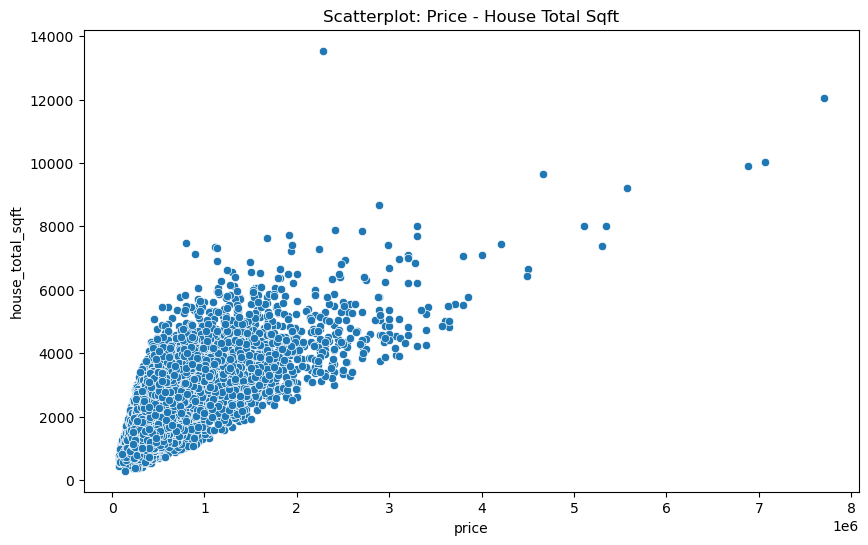

In [65]:
# Create a scatterplot to visualize the relationship between price and total house square footage

scatterplot_price_sqft = plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_house_eda,
    x='price',
    y='house_total_sqft'
)
plt.title('Scatterplot: Price - House Total Sqft')
plt.xlabel('price')
plt.ylabel('house_total_sqft')
plt.show()

In [66]:
# Export the Scatterplot

scatterplot_price_sqft.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'scatterplot_price_sqft.png'))

#### It seems clear that there is a positive strong correlation between the House Total Square Ft and Higher Prices, as we can see though there is still some difference within the correlation, which means that despite a bigger size house shows increasing prices and not decreasing for example, but in the same time there is a big range between the two, and i believe this can show that there is other correlated factors together with the house size that can drive the price up. We can also see that there is very few outliers but i think in this case are totally within the variety of houses and not related to errors within the data.

### [5] Create a pair plot of the entire data set. Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

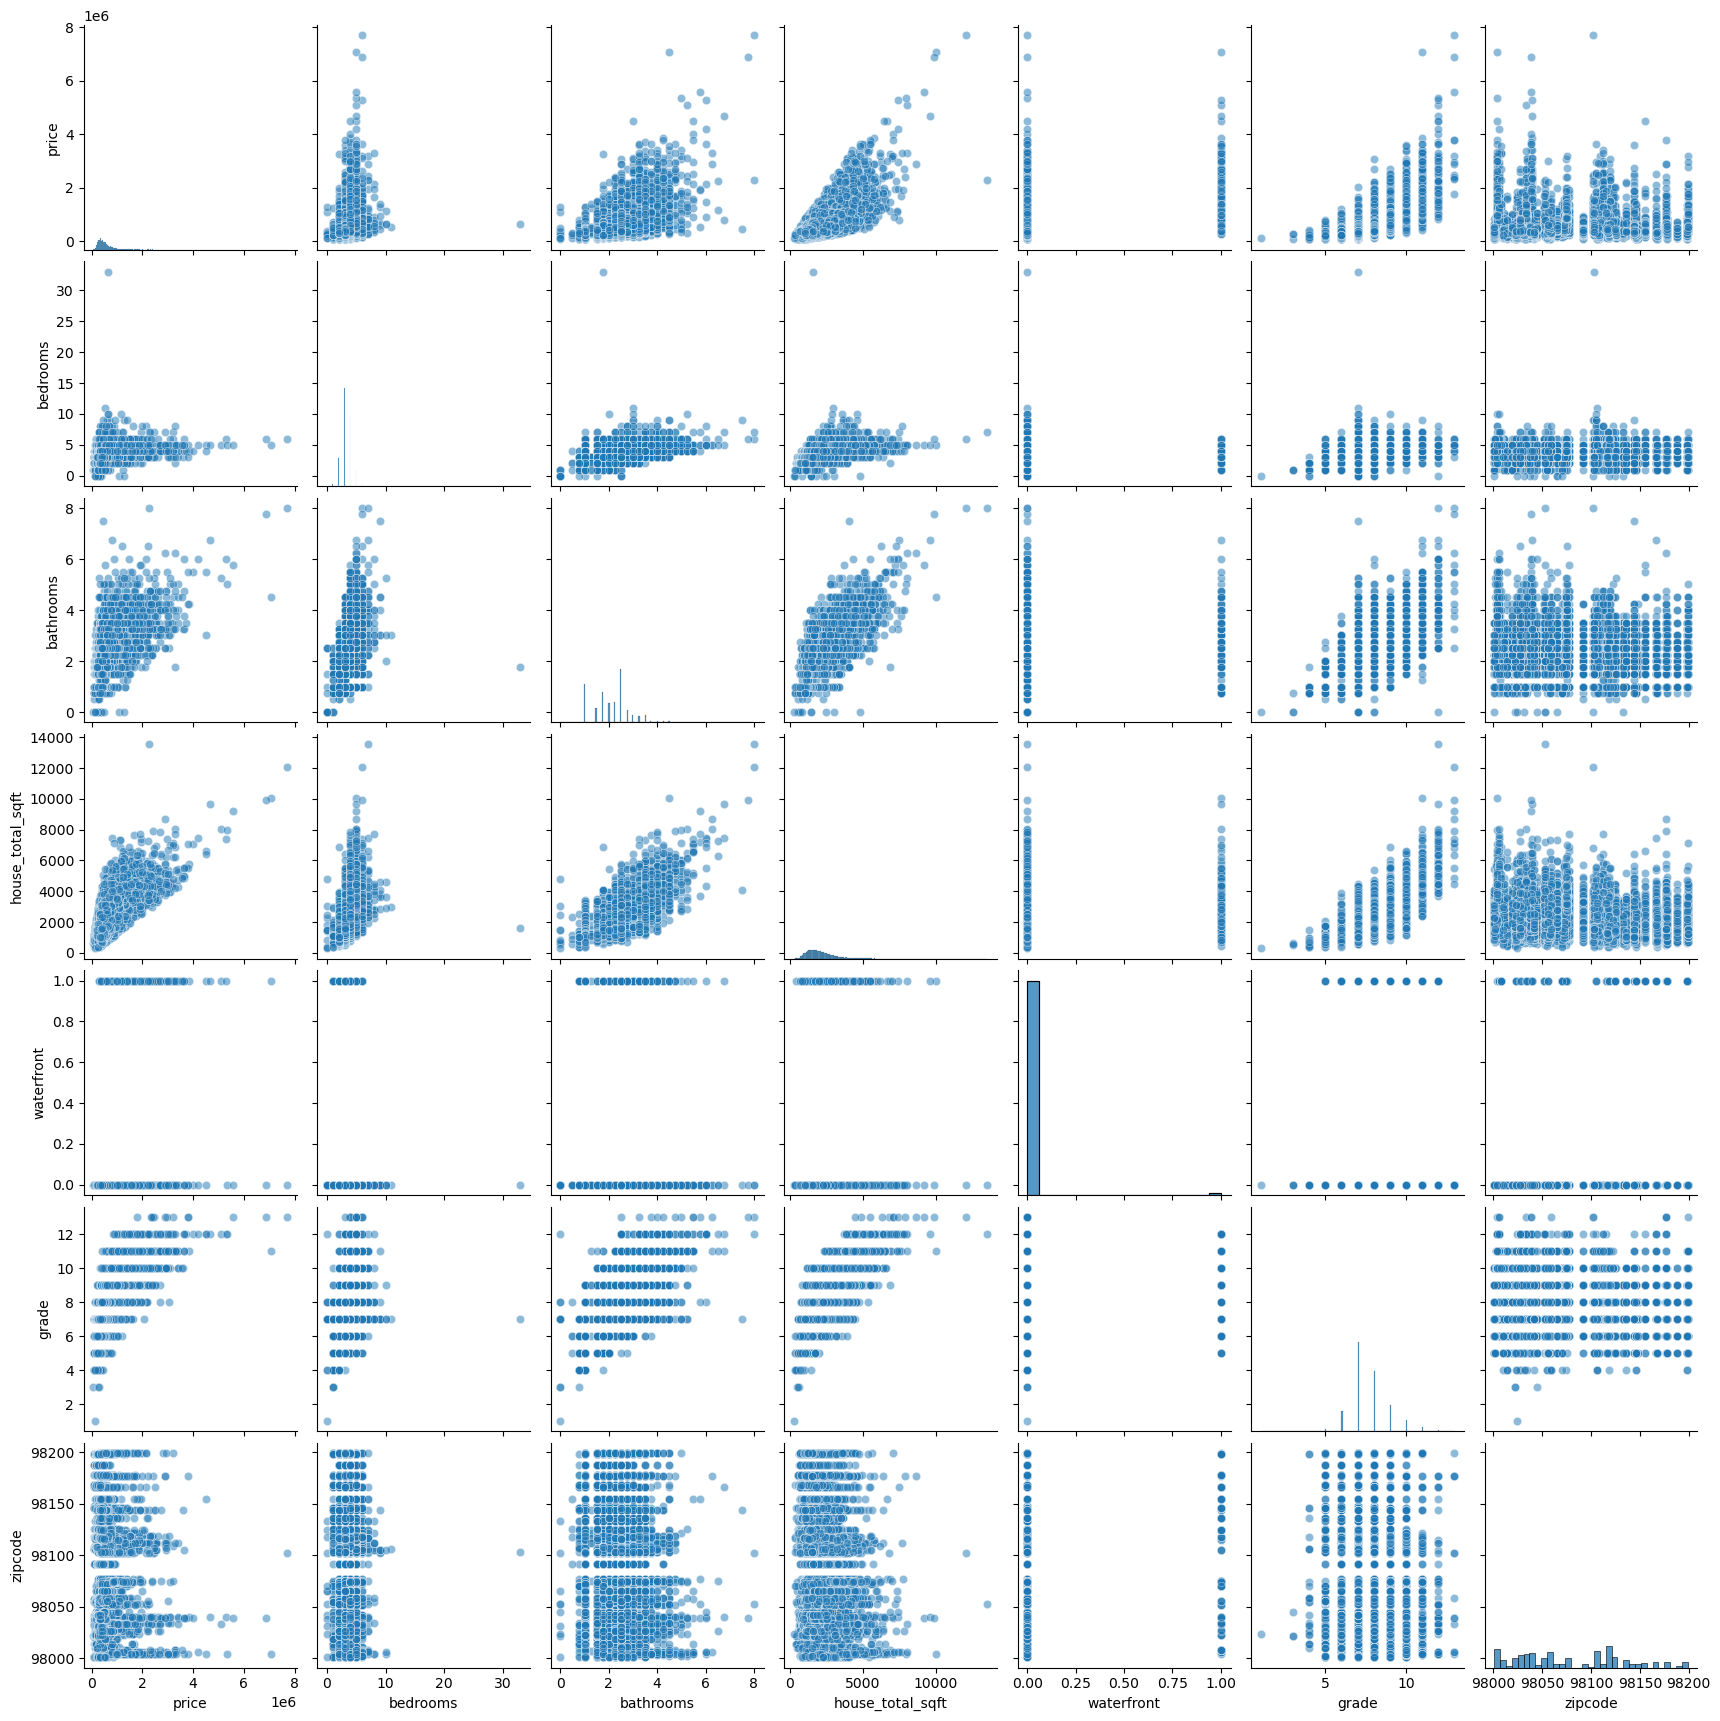

In [67]:
# Generate a pairplot to explore relationships between multiple variables

eda_pairplot = sns.pairplot(df_house_eda, diag_kind='hist', plot_kws={'alpha':0.5})
plt.show()

In [68]:
# Export the Pairplot

eda_pairplot.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'eda_pairplot.png'))

#### I believe that most of all these scatterplots are somehow not showing a clear correlations between those variables, the only variables that i can see are really affecting house prices are the total sqft of the house, and aswell the bathrooms with bedrooms numbers (despite this relationship seems weaker that the total sqft). This reinforces my believe that those three variables are somehow related to house prices in different ways, and therefore it will be interesting to investigate them further.

##### --------------------------------------------------

### [6] Create a categorical plot and interpret the results.

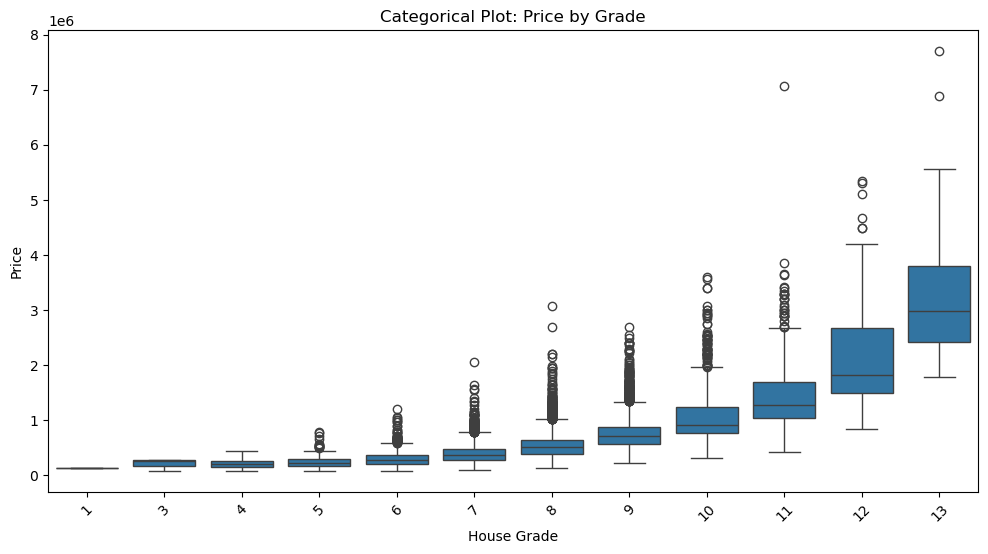

In [69]:
# Create a boxplot to compare house prices across different grades

plt.figure(figsize=(12, 6))

boxplot_price_grade = sns.boxplot(
    data=df_house_eda,
    x='grade',
    y='price'
)

plt.title('Categorical Plot: Price by Grade')
plt.xlabel('House Grade')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [70]:
# Export the Boxplot

boxplot_price_grade.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'boxplot_price_grade.png'))

#### The categorical boxplot clearly shows a strong positive relationship between house grade and price. Lower to medium grades (1–7) display relatively tight and consistent price distributions, with only moderate increases between categories. This suggests that within these grades, price variation is limited and more predictable.

#### From grade 8 onward, prices rise sharply and the distribution widens significantly. Higher grade properties not only command higher median prices, but also exhibit a much larger spread, including extreme outliers. This indicates that premium grade homes vary widely in quality, features, and luxury additions, making their prices less predictable.

#### Overall, the plot strongly supports the conclusion that house grade is one of the key drivers of price in the King County market, both in terms of median value and distribution shape.

##### --------------------------------------------------

### [7] Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

In [71]:
# I will create a binned zipcode boxplot to check is some zipcode ranges have lower or higher prices, as of one of my initial questions.

df_house_eda['zipcode_bin'] = pd.cut(
    df_house_eda['zipcode'],
    bins=range(df_house_eda['zipcode'].min(), df_house_eda['zipcode'].max() + 25, 25),
    labels=[f"{start}-{start+24}" for start in range(df_house_eda['zipcode'].min(), df_house_eda['zipcode'].max(), 25)]
)

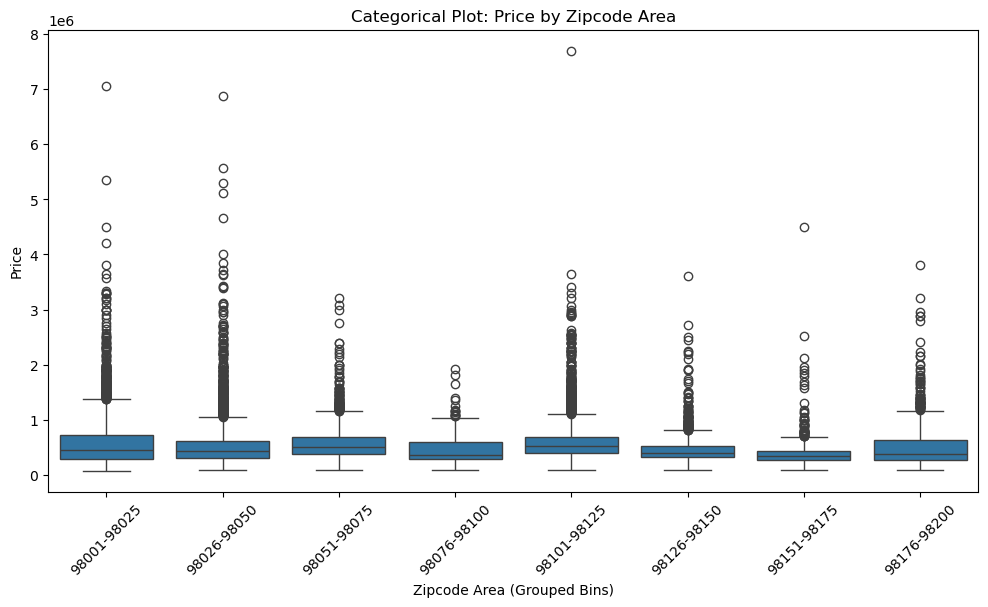

In [72]:
# Boxplot of house prices across grouped zipcode areas

plt.figure(figsize=(12,6))

boxplot_price_zipcode = sns.boxplot(
    data=df_house_eda,
    x='zipcode_bin',
    y='price'
)

plt.title('Categorical Plot: Price by Zipcode Area')
plt.xlabel('Zipcode Area (Grouped Bins)')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [73]:
# Export the Boxplot

boxplot_price_zipcode.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'boxplot_price_zipcode.png'))

##### --------------------------------------------------

#### **Which King County Areas have the highest house prices?**

#### It looks like the highest house prices are in the following zipcode areas: 98001-98025, 98026-98050, 98101-98125 (this area has the most expensive house), 98176-98200. We can see that in this area median prices are higher and also the price is less predictable but still trending upwards.

##### --------------------------------------------------

#### **Which King County Areas have the lowest house prices?**

#### It looks like the highest house prices are in the following zipcode areas: 98001-98025, 98026-98050, 98101-98125 (this area has the most expensive house), 98176-98200. We can see that in this area median prices are higher and also the price is less predictable but still trending upwards.

##### --------------------------------------------------

#### **Which period of the year house sales number increases?**

#### **Which period of the year house sales number decreases?**

#### From this preliminary EDA i cannot see yet date related visualization (as the exercise is asking me to esclude date variable).

##### --------------------------------------------------

#### **Are waterfront houses more expensive?**

#### The correlation between watefront houses and higher prices it cannot yet be labelled as a positive correlation, there is a very weak correlation of 0,27 between the two variables, which is still a positive correlation but is much much lower than other variables combination (grade, bathrooms, bedrooms). Also the scatterplot in the pairplot above doesnt show much different prices ranges between house with waterfront or not. This might require further investigation.

##### --------------------------------------------------

#### **How do housing prices vary across diﬀerent ZIP codes or geographical areas within the county?**

#### From the above boxplot we can see that there is some differences in median and price ranges between some zipcodes. I think we can assume that basically there is three zipcodes price ranges (High Prices, Medium Prices, Low Prices).

##### --------------------------------------------------

#### **Which ZIP codes have the highest and lowest median sale prices?**

In [74]:
# Calculate Zipcode Median Prices

df_house_eda.groupby('zipcode')['price'].median().sort_values(ascending=False)

zipcode
98039    1892500.0
98004    1150000.0
98040     993750.0
98112     915000.0
98005     765475.0
           ...    
98188     264000.0
98001     260000.0
98032     249000.0
98002     235000.0
98168     235000.0
Name: price, Length: 70, dtype: float64

#### We can see that the zipcode 98039 has the highest median sale price, and the zipcodes 98002 - 98168 have the lowest median sale price.

##### --------------------------------------------------

#### **Do property characteristics (such as condition or grade) vary significantly between the most expensive and least expensive ZIP codes?**

In [75]:
# Filter the dataset to include only the selected high price and low price ZIP codes

selected_zips = [98039, 98004, 98002, 98168]

df_sel = df_house_eda[df_house_eda['zipcode'].isin(selected_zips)]

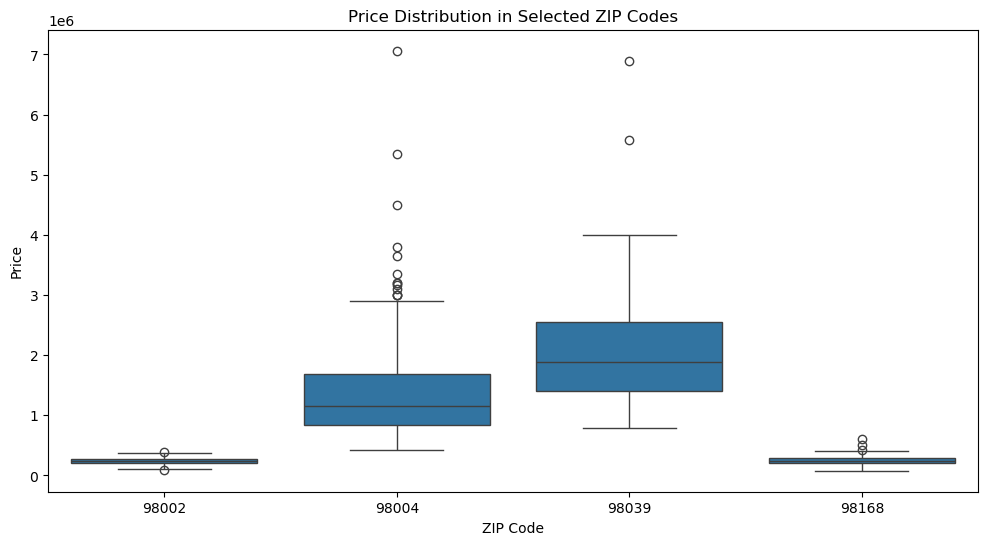

In [76]:
# Create a boxplot to compare price distributions across the selected ZIP codes

plt.figure(figsize=(12,6))

boxplot_selected_price_zipcode = sns.boxplot(data=df_sel, x='zipcode', y='price')

plt.title('Price Distribution in Selected ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Price')
plt.show()

In [77]:
# Export the Boxplot

boxplot_selected_price_zipcode.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'boxplot_selected_price_zipcode.png'))

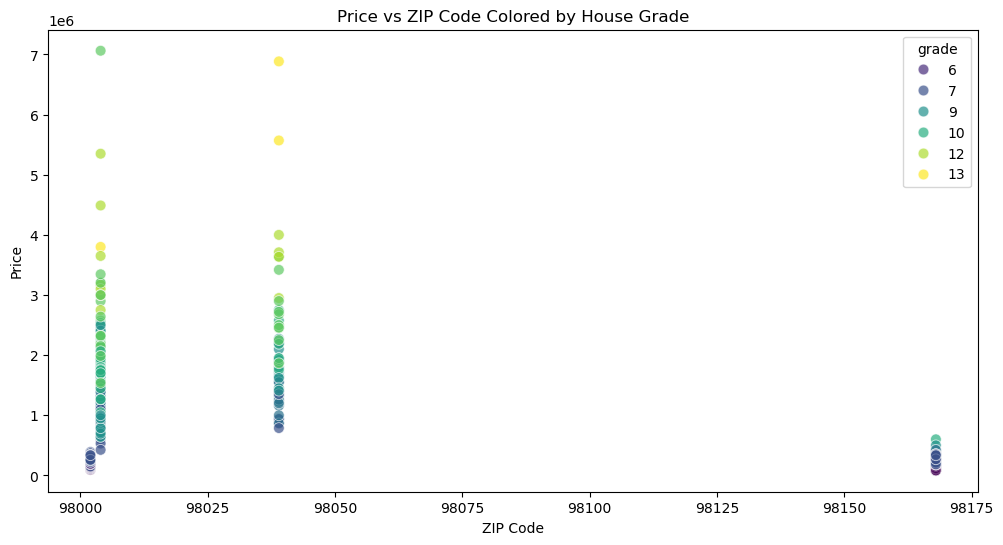

In [78]:
# Create a scatter plot showing price variation by ZIP code, colored by house grade

plt.figure(figsize=(12,6))

scatterplot_selected_zipcodes_grade = sns.scatterplot(
    data=df_sel,
    x='zipcode',
    y='price',
    hue='grade',
    palette='viridis',
    s=60,
    alpha=0.7
)

plt.title('Price vs ZIP Code Colored by House Grade')
plt.xlabel('ZIP Code')
plt.ylabel('Price')
plt.show()

In [79]:
# Export the Scatterplot

scatterplot_selected_zipcodes_grade.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'scatterplot_selected_zipcodes_grade.png'))

#### **Do property characteristics (such as condition or grade) vary significantly between the most expensive and least expensive ZIP codes?**

#### We can clearly see from these visualizations that indeed house grade is much higher overall in correlation with higher prices in the two most expensive zipcodes, while in the two least expensive the house_grade/price is overall lower, which in fact there isn't much higher grade houses.

##### --------------------------------------------------

#### **Are price diﬀerences across ZIP codes consistent over the months included in the dataset?**

#### **How do renovation years relate to changes in property value?**

#### At the moment i don't have any relevant data to assess these question, as the exercise is asking me to not use date variables.

##### --------------------------------------------------

#### **Are larger homes concentrated in specific neighbourhoods or ZIP codes?**

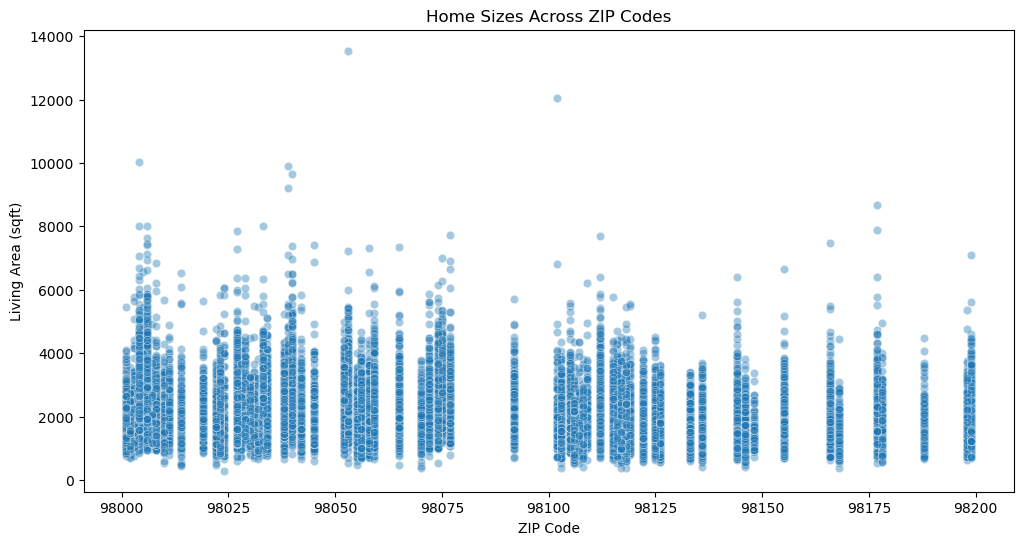

In [81]:
# Create a scatter plot to show how home sizes vary across different ZIP codes

plt.figure(figsize=(12,6))

scatterplot_zipcode_sqft = sns.scatterplot(data=df_house_eda, x='zipcode', y='house_total_sqft', alpha=0.4)

plt.title('Home Sizes Across ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Living Area (sqft)')
plt.show()

In [82]:
# Export the Scatterplot

scatterplot_zipcode_sqft.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'scatterplot_zipcode_sqft.png'))

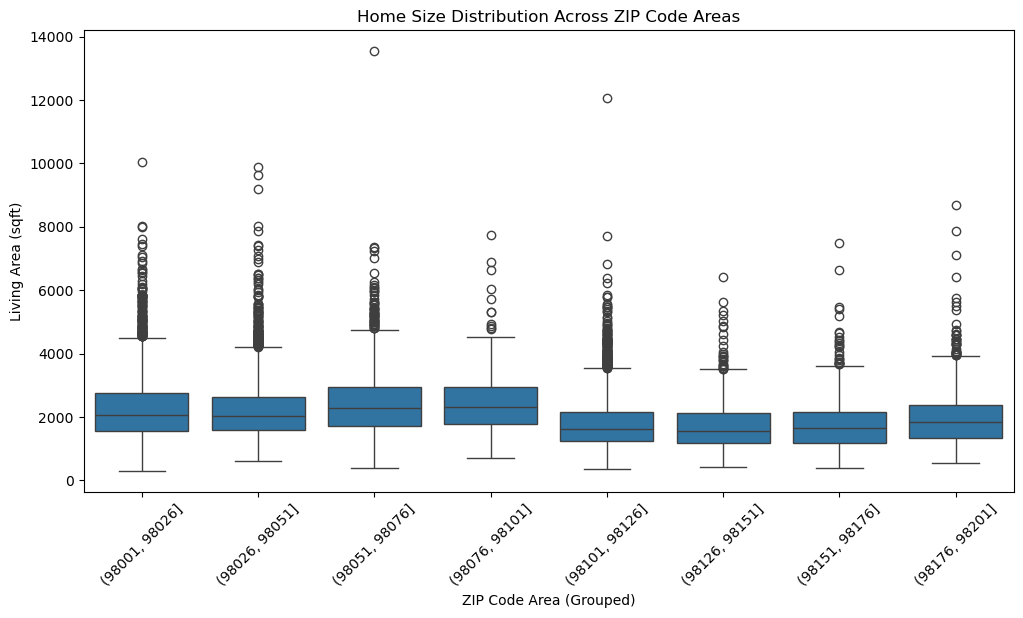

In [83]:
# Create zipcode bins and boxplot showing home size distribution across ZIP code groups

df_house_eda['zipcode_bin'] = pd.cut(
    df_house_eda['zipcode'],
    bins=range(df_house_eda['zipcode'].min(), df_house_eda['zipcode'].max()+25, 25)
)
plt.figure(figsize=(12,6))

scatterplot_zipcode_groups_sqft = sns.boxplot(data=df_house_eda, x='zipcode_bin', y='house_total_sqft')

plt.title('Home Size Distribution Across ZIP Code Areas')
plt.xlabel('ZIP Code Area (Grouped)')
plt.ylabel('Living Area (sqft)')
plt.xticks(rotation=45)
plt.show()

In [84]:
# Export the Scatterplot

scatterplot_zipcode_groups_sqft.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'scatterplot_zipcode_groups_sqft.png'))

#### **Are larger homes concentrated in specific neighbourhoods or ZIP codes?**

#### Apart from few outliers we can only see that some areas have slightly bigger houses overall, but this difference is not so clear. Some Zipcode area exceed 3/4K sqft with consistency, while other zipcode areas do the same but with much less consistency. Therefore at the moment i cannot say with certainty that larger homes are concentrated in specific areas.

##### --------------------------------------------------

#### **Do waterfront or high view homes behave diﬀerently in pricing compared to other properties?**

#### This question is already being evaluated previously, so i think is a question that i have created twice, in a very similar formulation.

##### --------------------------------------------------

### [8] Define any hypotheses that you can at this point. You’ll be testing these later on.

#### If a house has a higher grade then price increases.

#### If a house has a higher condition then price increases.

#### If a house has a waterfront view then price increases.

#### If a house has a bigger total sqft then price increases.

##### --------------------------------------------------

In [87]:
# Export data to Csv

df_house.to_pickle(os.path.join(path, '02 - Data','Prepared Data', 'house_dataset_clean.pkl'))